<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MNIST</a></span><ul class="toc-item"><li><span><a href="#Log-Load" data-toc-modified-id="Log-Load-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Log Load</a></span></li></ul></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>CIFAR10</a></span></li></ul></div>

In [33]:
import h5py
import numpy as np
import pandas as pd

import sys
sys.path.append('../code')

import matplotlib.pyplot as plt

In [63]:
steps = 50
nb_sample = 1000
methods = ['VBP','GC','GB','IB']

# MNIST

## Log Load

In [62]:
attr_method_dict = {
    'VBP':{
        'data':[],
        'color':'orange'
    },
    'GC':{
        'data':[],
        'color':'blue'
    },
    'GB':{
        'data':[],
        'color':'red'
    },
    'IB':{
        'data':[],
        'color':'green'
    }
}

for attr_method in attr_method_dict.keys():
    hf = h5py.File('../evaluation/mnist_{}_steps50_ckp11_sample0.1.hdf5'.format(attr_method), 'r')
    attr_method_dict[attr_method]['data'] = hf

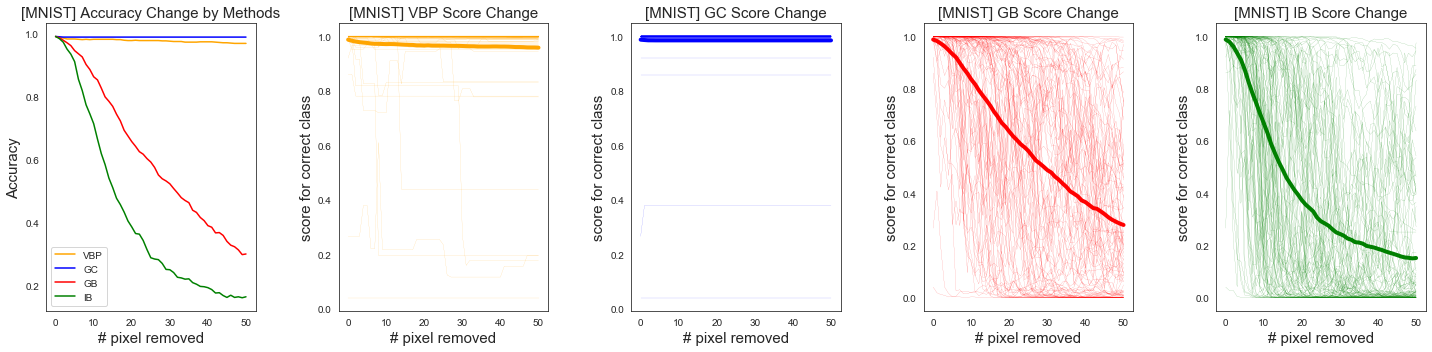

In [84]:
f, ax = plt.subplots(1,5, figsize=(20,5))

for m in range(len(methods)):
    method = methods[m]
    # color and data
    color = attr_method_dict[method]['color']
    data = attr_method_dict[method]['data']
    # acc
    acc = np.array(data['acc'])
    
    ax[0].plot(range(steps+1), acc, label=method, color=color)
    ax[0].legend()

ax[0].set_xlabel('# pixel removed', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_title('[MNIST] Accuracy Change by Methods', size=15)

for m in range(len(methods)):
    method = methods[m]
    # color and data
    color = attr_method_dict[method]['color']
    data = attr_method_dict[method]['data']
    # score
    score = np.array(data['score'])
    mean_score = np.mean(score, axis=1)
    # plotting average score
    ax[m+1].plot(range(steps+1), mean_score, label=method, color=color, linewidth=4)
    
    # sample index
    np.random.seed(223)
    sample_idx = np.random.choice(nb_sample, 100, replace=False)
    sample_score = score[:,sample_idx]
    for i in range(100):
        ax[m+1].plot(range(steps+1), sample_score[:,i], color=color, linewidth=0.1)
    
    
    ax[m+1].set_xlabel('# pixel removed', fontsize=15)
    ax[m+1].set_ylabel('score for correct class', fontsize=15)
    ax[m+1].set_title('[MNIST] {} Score Change'.format(method), size=15)

plt.tight_layout()
plt.savefig('../images/results/score_acc_change.jpg',dpi=150)

# CIFAR10

In [62]:
attr_method_dict = {
    'VBP':{
        'data':[],
        'color':'orange'
    },
    'GC':{
        'data':[],
        'color':'blue'
    },
    'GB':{
        'data':[],
        'color':'red'
    },
    'IB':{
        'data':[],
        'color':'green'
    }
}

for attr_method in attr_method_dict.keys():
    hf = h5py.File('../evaluation/mnist_{}_steps50_ckp11_sample0.1.hdf5'.format(attr_method), 'r')
    attr_method_dict[attr_method]['data'] = hf

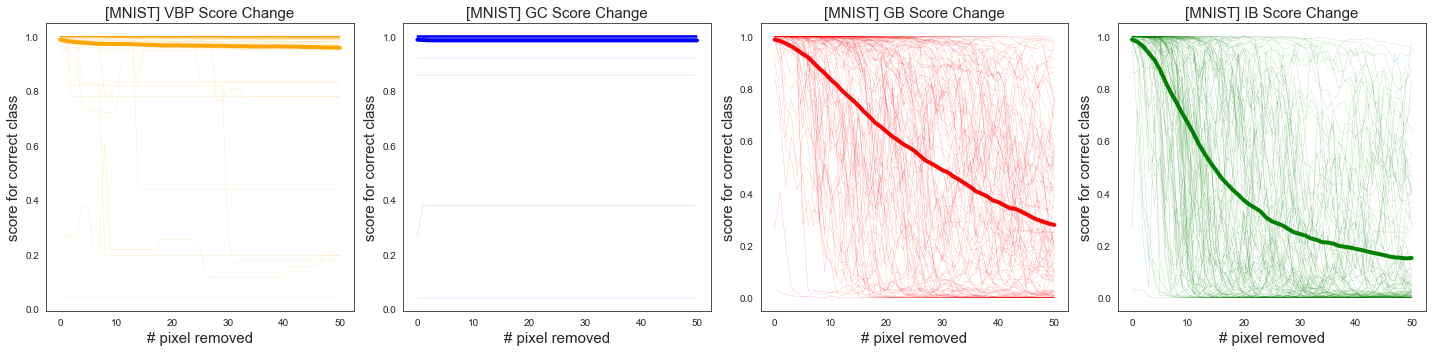

In [73]:
f, ax = plt.subplots(1,4, figsize=(20,5))

for m in range(len(methods)):
    method = methods[m]
    # color and data
    color = attr_method_dict[method]['color']
    data = attr_method_dict[method]['data']
    # score
    score = np.array(data['score'])
    mean_score = np.mean(score, axis=1)
    # plotting average score
    ax[m].plot(range(steps+1), mean_score, label=method, color=color, linewidth=4)
    
    # sample index
    np.random.seed(223)
    sample_idx = np.random.choice(nb_sample, 100, replace=False)
    sample_score = score[:,sample_idx]
    for i in range(100):
        ax[m].plot(range(steps+1), sample_score[:,i], color=color, linewidth=0.1)
    
    
    ax[m].set_xlabel('# pixel removed', fontsize=15)
    ax[m].set_ylabel('score for correct class', fontsize=15)
    ax[m].set_title('[MNIST] {} Score Change'.format(method), size=15)
    
plt.tight_layout()
plt.savefig('../images/results/score_change_by_methods.jpg',dpi=150)

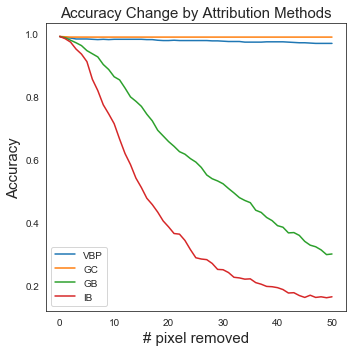

In [57]:
plt.figure(figsize=(5,5))
for attr_method in attr_method_dict.keys():
    acc = np.array(attr_method_dict[attr_method]['acc'])
    plt.plot(range(steps+1), acc, label=attr_method)
    plt.legend()

plt.xlabel('# pixel removed', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Accuracy Change by Attribution Methods', size=15)
plt.tight_layout()
plt.savefig('../images/results/accuracy_change.jpg',dpi=150)